# Exploration des données ASOS

## Importer les bibliothèques

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Libraries imported successfully!


## Charger le dataset

In [ ]:
df = pd.read_csv('../data/products_asos.csv')
df

Dataset loaded successfully!
Shape: (30845, 9)
Rows: 30,845
Columns: 9


## 3. Basic Dataset Information

In [ ]:
df.shape

=== DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30845 entries, 0 to 30844
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   url          30827 non-null  object 
 1   name         30827 non-null  object 
 2   size         30827 non-null  object 
 3   category     30827 non-null  object 
 4   price        30827 non-null  object 
 5   color        30827 non-null  object 
 6   sku          30827 non-null  float64
 7   description  30827 non-null  object 
 8   images       30827 non-null  object 
dtypes: float64(1), object(8)
memory usage: 2.1+ MB
None

=== COLUMN NAMES ===
1. url
2. name
3. size
4. category
5. price
6. color
7. sku
8. description
9. images


In [ ]:
df.head()

=== FIRST 3 ROWS ===


,url,name,size,category,price,color,sku,description,images
0,https://www.asos.com/stradivarius/stradivarius-faux-leather-biker-jacket-in-black/prd/203490700?...,New Look trench coat in camel,"UK 4,UK 6,UK 8,UK 10,UK 12,UK 14 - Out of stock,UK 16,UK 18",New Look trench coat in camel,49.99,Neutral,126704571.0,[{'Product Details': 'Coats & Jackets by New LookLow-key layeringNotch collarButton placketTie w...,['https://images.asos-media.com/products/new-look-trench-coat-in-camel/204351106-4?$n_1920w$&wid...
1,https://www.asos.com/stradivarius/stradivarius-trench-coat-in-light-stone/prd/203439012?clr=ston...,New Look trench coat in camel,"UK 4,UK 6,UK 8,UK 10,UK 12,UK 14 - Out of stock,UK 16,UK 18",New Look trench coat in camel,49.99,Neutral,126704571.0,[{'Product Details': 'Coats & Jackets by New LookLow-key layeringNotch collarButton placketTie w...,['https://images.asos-media.com/products/new-look-trench-coat-in-camel/204351106-4?$n_1920w$&wid...
2,https://www.asos.com/asos-design/asos-design-longline-trench-coat-in-stone/prd/201104221?clr=sto...,New Look trench coat in camel,"UK 4,UK 6,UK 8,UK 10,UK 12,UK 14 - Out of stock,UK 16,UK 18",New Look trench coat in camel,49.99,Neutral,126704571.0,[{'Product Details': 'Coats & Jackets by New LookLow-key layeringNotch collarButton placketTie w...,['https://images.asos-media.com/products/new-look-trench-coat-in-camel/204351106-4?$n_1920w$&wid...


In [ ]:
df.tail()

In [6]:
# Display data types
print("=== DATA TYPES ===")
dtype_df = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Null Count': df.isnull().sum(),
    'Null Percentage': (df.isnull().sum() / len(df)) * 100
})
dtype_df

=== DATA TYPES ===


,Column,Data Type,Non-Null Count,Null Count,Null Percentage
url,url,object,30827,18,0.058356
name,name,object,30827,18,0.058356
size,size,object,30827,18,0.058356
category,category,object,30827,18,0.058356
price,price,object,30827,18,0.058356
color,color,object,30827,18,0.058356
sku,sku,float64,30827,18,0.058356
description,description,object,30827,18,0.058356
images,images,object,30827,18,0.058356


## 4. Missing Data Analysis

=== MISSING DATA SUMMARY ===
                  Column  Missing Count  Missing Percentage
url                  url             18            0.058356
name                name             18            0.058356
size                size             18            0.058356
category        category             18            0.058356
price              price             18            0.058356
color              color             18            0.058356
sku                  sku             18            0.058356
description  description             18            0.058356
images            images             18            0.058356


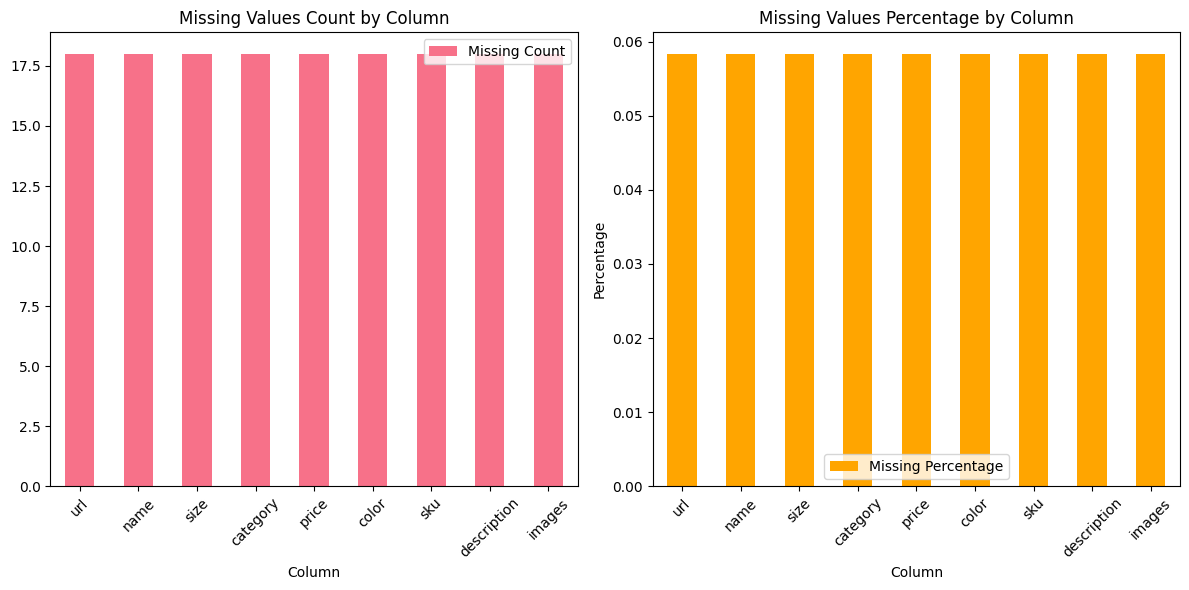

In [7]:
# Detailed missing data analysis
print("=== MISSING DATA SUMMARY ===")
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': missing_data,
    'Missing Percentage': missing_percentage
}).sort_values('Missing Percentage', ascending=False)

print(missing_df)

# Visualize missing data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
missing_df[missing_df['Missing Count'] > 0].plot(x='Column', y='Missing Count', kind='bar', ax=plt.gca())
plt.title('Missing Values Count by Column')
plt.xticks(rotation=45)
plt.tight_layout()

plt.subplot(1, 2, 2)
missing_df[missing_df['Missing Percentage'] > 0].plot(x='Column', y='Missing Percentage', kind='bar', ax=plt.gca(), color='orange')
plt.title('Missing Values Percentage by Column')
plt.xticks(rotation=45)
plt.ylabel('Percentage')
plt.tight_layout()

plt.show()

## 5. Column-wise Analysis

In [8]:
# Analyze URL column
print("=== URL COLUMN ANALYSIS ===")
print(f"Unique URLs: {df['url'].nunique():,}")
print(f"Total rows: {len(df):,}")
print(f"Duplicate URLs: {len(df) - df['url'].nunique():,}")

# Show some sample URLs
print("\nSample URLs:")
for i, url in enumerate(df['url'].head(3), 1):
    print(f"{i}. {url[:100]}...")

=== URL COLUMN ANALYSIS ===
Unique URLs: 30,468
Total rows: 30,845
Duplicate URLs: 377

Sample URLs:
1. https://www.asos.com/stradivarius/stradivarius-faux-leather-biker-jacket-in-black/prd/203490700?clr=...
2. https://www.asos.com/stradivarius/stradivarius-trench-coat-in-light-stone/prd/203439012?clr=stone&co...
3. https://www.asos.com/asos-design/asos-design-longline-trench-coat-in-stone/prd/201104221?clr=stone&c...


In [9]:
# Analyze NAME column
print("=== NAME COLUMN ANALYSIS ===")
print(f"Unique product names: {df['name'].nunique():,}")
print(f"Missing names: {df['name'].isnull().sum()}")

# Most common product names
print("\nMost common product names:")
name_counts = df['name'].value_counts().head(10)
for name, count in name_counts.items():
    print(f"{count:3d}: {name}")

# Name length analysis
name_lengths = df['name'].str.len()
print(f"\nName length stats:")
print(f"Average length: {name_lengths.mean():.1f}")
print(f"Min length: {name_lengths.min()}")
print(f"Max length: {name_lengths.max()}")

=== NAME COLUMN ANALYSIS ===
Unique product names: 29,493
Missing names: 18

Most common product names:
  7: ASOS 4505 icon performance t-shirt
  6: Barney's Originals Emma real leather jacket with belt
  5: ASOS 4505 icon slim training jogger in loop back co ord
  5: Barbour Beadnell wax jacket in navy
  5: Stradivarius oversized blazer in black
  5: ASOS DESIGN Tall ultimate faux leather biker jacket in black
  5: ASOS 4505 Curve icon vest in longer length
  5: Columbia Puffect cropped jacket in black Exclusive at ASOS
  5: Berghaus Nula Micro water resistant padded jacket in black
  5: COLLUSION shaggy faux mongolian fur jacket in cream

Name length stats:
Average length: 54.9
Min length: 14.0
Max length: 115.0


In [10]:
# Analyze SIZE column
print("=== SIZE COLUMN ANALYSIS ===")
print(f"Missing sizes: {df['size'].isnull().sum()}")

# Sample size values to understand the format
print("\nSample size values:")
size_samples = df['size'].dropna().head(10)
for i, size in enumerate(size_samples, 1):
    print(f"{i}. {size}")

# Analyze size patterns
print("\nSize statistics:")
size_lengths = df['size'].str.len()
print(f"Average size string length: {size_lengths.mean():.1f}")
print(f"Max size string length: {size_lengths.max()}")

=== SIZE COLUMN ANALYSIS ===
Missing sizes: 18

Sample size values:
1. UK 4,UK 6,UK 8,UK 10,UK 12,UK 14 - Out of stock,UK 16,UK 18
2. UK 4,UK 6,UK 8,UK 10,UK 12,UK 14 - Out of stock,UK 16,UK 18
3. UK 4,UK 6,UK 8,UK 10,UK 12,UK 14 - Out of stock,UK 16,UK 18
4. UK 4,UK 6,UK 8,UK 10,UK 12,UK 14 - Out of stock,UK 16,UK 18
5. XS - UK 6,S - UK 8,M - UK 10,L - UK 12,XL - UK 14
6. XS - UK 6,S - UK 8,M - UK 10,L - UK 12,XL - UK 14
7. XS - UK 6,S - UK 8,M - UK 10,L - UK 12,XL - UK 14
8. XS - UK 6,S - UK 8,M - UK 10,L - UK 12,XL - UK 14
9. 3XL - UK 18 - Out of stock,XS - UK 6,S - UK 8,M - UK 10,L - UK 12,XL - UK 14,2XL - UK 16 - Out of stock
10. 3XL - UK 18 - Out of stock,XS - UK 6,S - UK 8,M - UK 10,L - UK 12,XL - UK 14,2XL - UK 16 - Out of stock

Size statistics:
Average size string length: 76.6
Max size string length: 975.0


=== CATEGORY COLUMN ANALYSIS ===
Unique categories: 29492
Missing categories: 18

Top 15 categories:
    7: ASOS 4505 icon performance t-shirt
    6: Barney's Originals Emma real leather jacket with belt
    5: ASOS 4505 icon long sleeve run top
    5: COLLUSION shaggy faux mongolian fur jacket in cream
    5: Stradivarius oversized blazer in black
    5: ASOS DESIGN Tall ultimate faux leather biker jacket in black
    5: Berghaus Nula Micro water resistant padded jacket in black
    5: ASOS 4505 icon slim training jogger in loop back co ord
    5: Barbour Beadnell wax jacket in navy
    5: Columbia Puffect cropped jacket in black Exclusive at ASOS
    5: ASOS 4505 Curve icon vest in longer length
    4: ASOS 4505 performance gilet in brown
    4: ASOS EDITION hooded trench coat in khaki
    4: Stradivarius STR faux leather fur trim coat in brown
    4: Topshop mid length tie belted puffer jacket in forest green


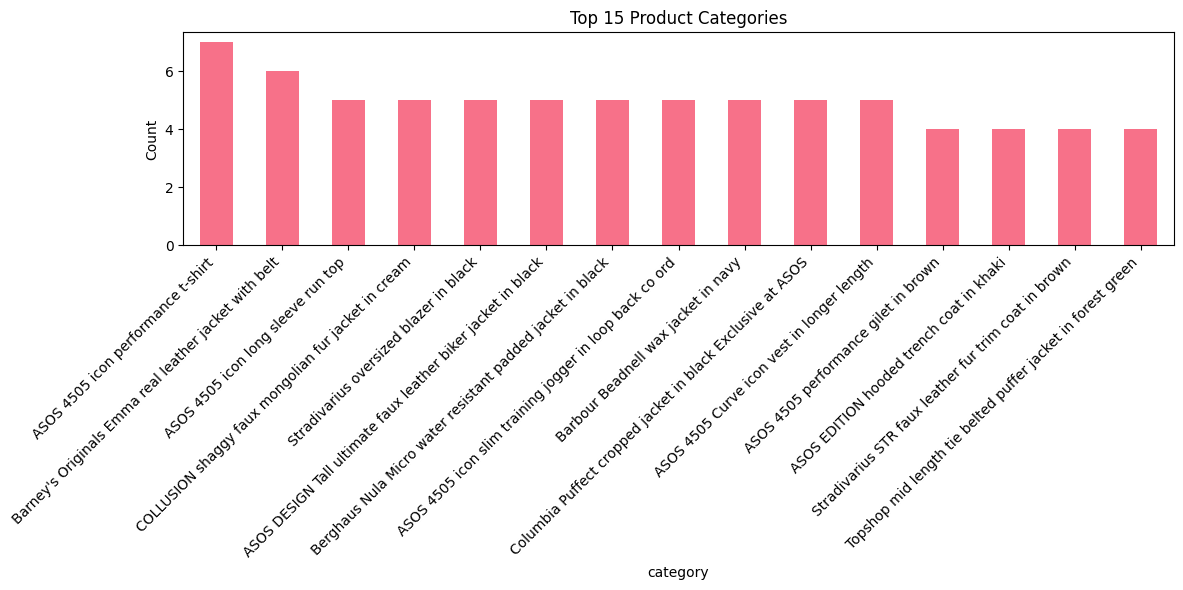

In [11]:
# Analyze CATEGORY column
print("=== CATEGORY COLUMN ANALYSIS ===")
print(f"Unique categories: {df['category'].nunique()}")
print(f"Missing categories: {df['category'].isnull().sum()}")

# Most common categories
print("\nTop 15 categories:")
category_counts = df['category'].value_counts().head(15)
for category, count in category_counts.items():
    print(f"{count:5d}: {category}")

# Visualize top categories
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar')
plt.title('Top 15 Product Categories')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

=== PRICE COLUMN ANALYSIS ===
Missing prices: 18
Data type: object

Price statistics:
count    30827.000000
mean        41.016020
std         33.088394
min          3.000000
25%         21.000000
50%         32.000000
75%         49.500000
max        550.000000
Name: price_numeric, dtype: float64


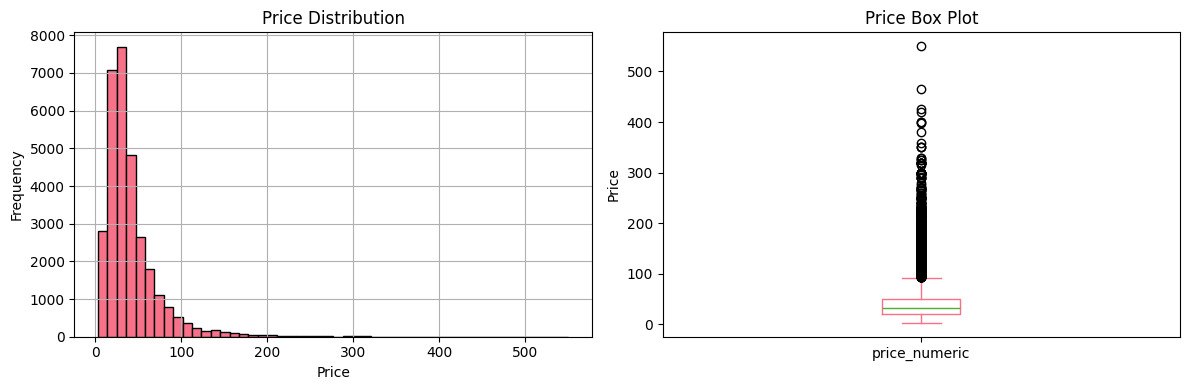


Price ranges distribution:
price_numeric
0-25       10469
25-50      13244
50-100      5588
100-200     1369
200-500      156
500+           1
Name: count, dtype: int64


In [12]:
# Analyze PRICE column
print("=== PRICE COLUMN ANALYSIS ===")
print(f"Missing prices: {df['price'].isnull().sum()}")
print(f"Data type: {df['price'].dtype}")

# Convert price to numeric if it's not already
if df['price'].dtype == 'object':
    # Remove currency symbols and convert to float
    df['price_numeric'] = pd.to_numeric(df['price'].astype(str).str.replace(r'[^0-9.]', '', regex=True), errors='coerce')
    price_col = 'price_numeric'
else:
    price_col = 'price'

# Price statistics
print(f"\nPrice statistics:")
print(df[price_col].describe())

# Price distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
df[price_col].hist(bins=50, edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df[price_col].plot(kind='box')
plt.title('Price Box Plot')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

# Price ranges
price_ranges = pd.cut(df[price_col], bins=[0, 25, 50, 100, 200, 500, df[price_col].max()], 
                     labels=['0-25', '25-50', '50-100', '100-200', '200-500', '500+'])
print("\nPrice ranges distribution:")
print(price_ranges.value_counts().sort_index())

=== COLOR COLUMN ANALYSIS ===
Unique colors: 3636
Missing colors: 18

Top 15 colors:
 3289: BLACK
 2956: Black
  933: MULTI
  914: WHITE
  718: White
  688: PINK
  670: Pink
  513: GREEN
  460: Green
  459: BLUE
  449: Blue
  449: Multi
  386: BROWN
  365: Brown
  340: KHAKI


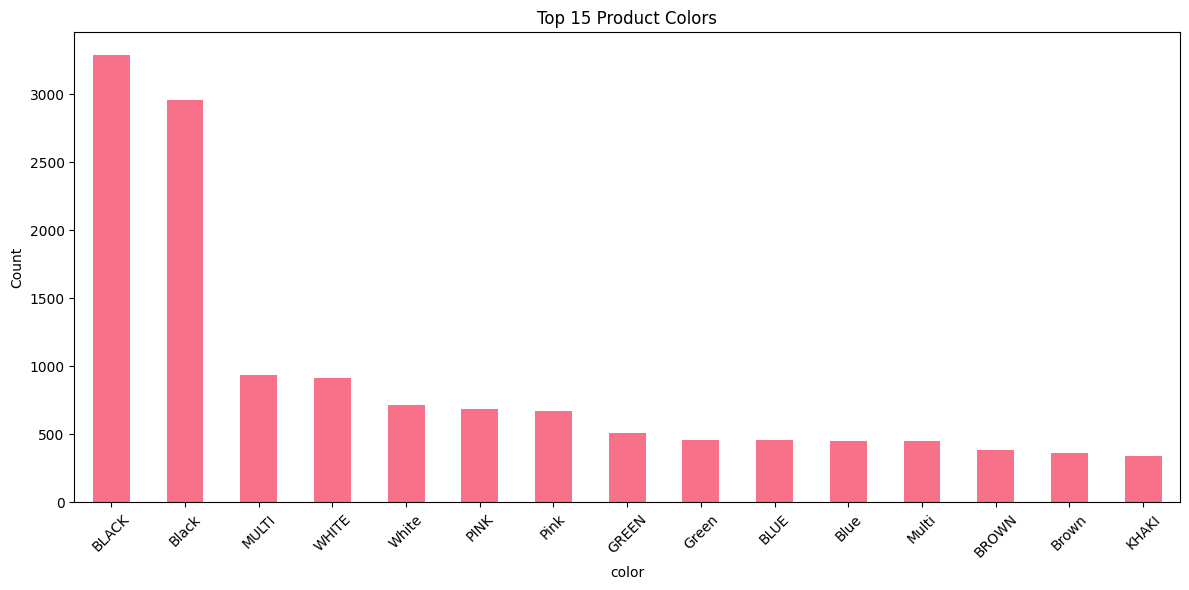

In [13]:
# Analyze COLOR column
print("=== COLOR COLUMN ANALYSIS ===")
print(f"Unique colors: {df['color'].nunique()}")
print(f"Missing colors: {df['color'].isnull().sum()}")

# Most common colors
print("\nTop 15 colors:")
color_counts = df['color'].value_counts().head(15)
for color, count in color_counts.items():
    print(f"{count:5d}: {color}")

# Visualize top colors
plt.figure(figsize=(12, 6))
color_counts.plot(kind='bar')
plt.title('Top 15 Product Colors')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [14]:
# Analyze SKU column
print("=== SKU COLUMN ANALYSIS ===")
print(f"Unique SKUs: {df['sku'].nunique():,}")
print(f"Missing SKUs: {df['sku'].isnull().sum()}")
print(f"Duplicate SKUs: {len(df) - df['sku'].nunique():,}")

# Sample SKUs
print("\nSample SKUs:")
for i, sku in enumerate(df['sku'].dropna().head(10), 1):
    print(f"{i}. {sku}")

=== SKU COLUMN ANALYSIS ===
Unique SKUs: 29,971
Missing SKUs: 18
Duplicate SKUs: 874

Sample SKUs:
1. 126704571.0
2. 126704571.0
3. 126704571.0
4. 126704571.0
5. 123650194.0
6. 123650194.0
7. 123650194.0
8. 123650194.0
9. 125806824.0
10. 125806824.0


In [15]:
# Analyze DESCRIPTION column
print("=== DESCRIPTION COLUMN ANALYSIS ===")
print(f"Missing descriptions: {df['description'].isnull().sum()}")

# Description length analysis
desc_lengths = df['description'].str.len()
print(f"\nDescription length statistics:")
print(desc_lengths.describe())

# Sample description
print("\nSample description:")
sample_desc = df['description'].dropna().iloc[0]
print(f"Length: {len(sample_desc)} characters")
print(f"First 200 chars: {sample_desc[:200]}...")

# Check if descriptions are in JSON format
print("\nDescription format check:")
sample_descriptions = df['description'].dropna().head(5)
json_count = 0
for desc in sample_descriptions:
    if desc.startswith('[') and desc.endswith(']'):
        json_count += 1
print(f"JSON-like format detected in {json_count}/5 samples")

=== DESCRIPTION COLUMN ANALYSIS ===
Missing descriptions: 18

Description length statistics:
count    30827.000000
mean       758.114802
std        110.754845
min        185.000000
25%        685.000000
50%        764.000000
75%        833.000000
max       1754.000000
Name: description, dtype: float64

Sample description:
Length: 862 characters
First 200 chars: [{'Product Details': 'Coats & Jackets by New LookLow-key layeringNotch collarButton placketTie waistRegular fitProduct Code: 126704571'}, {'Brand': 'Since setting up shop in the 60s, New Look has beco...

Description format check:
JSON-like format detected in 5/5 samples


In [16]:
# Analyze IMAGES column
print("=== IMAGES COLUMN ANALYSIS ===")
print(f"Missing images: {df['images'].isnull().sum()}")

# Sample images
print("\nSample images data:")
sample_images = df['images'].dropna().iloc[0]
print(f"Length: {len(sample_images)} characters")
print(f"First 200 chars: {sample_images[:200]}...")

# Check if images are in list format
print("\nImages format check:")
sample_images_data = df['images'].dropna().head(5)
list_count = 0
for img in sample_images_data:
    if img.startswith('[') and img.endswith(']'):
        list_count += 1
print(f"List-like format detected in {list_count}/5 samples")

# Try to count images per product
try:
    # Parse first few image lists to see average number of images
    image_counts = []
    for img in sample_images_data:
        try:
            img_list = ast.literal_eval(img)
            image_counts.append(len(img_list))
        except:
            continue
    
    if image_counts:
        print(f"\nSample image counts per product: {image_counts}")
        print(f"Average images per product (from sample): {np.mean(image_counts):.1f}")
except Exception as e:
    print(f"Could not parse image counts: {e}")

=== IMAGES COLUMN ANALYSIS ===
Missing images: 18

Sample images data:
Length: 593 characters
First 200 chars: ['https://images.asos-media.com/products/new-look-trench-coat-in-camel/204351106-4?$n_1920w$&wid=1926&fit=constrain', 'https://images.asos-media.com/products/new-look-trench-coat-in-camel/204351106-1-...

Images format check:
List-like format detected in 5/5 samples

Sample image counts per product: [5, 5, 5, 5, 5]
Average images per product (from sample): 5.0


## 6. Data Quality Assessment

In [17]:
# Overall data quality assessment
print("=== DATA QUALITY ASSESSMENT ===")

# Completeness
completeness = (1 - df.isnull().sum() / len(df)) * 100
print("\n1. COMPLETENESS (% of non-null values):")
for col in df.columns:
    print(f"{col:12}: {completeness[col]:6.2f}%")

# Uniqueness
print("\n2. UNIQUENESS:")
for col in df.columns:
    unique_ratio = (df[col].nunique() / len(df)) * 100
    print(f"{col:12}: {df[col].nunique():7,} unique ({unique_ratio:6.2f}%)")

# Duplicates
print("\n3. DUPLICATES:")
total_duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {total_duplicates:,} ({(total_duplicates/len(df))*100:.2f}%)")

# Check for completely empty rows
empty_rows = df.isnull().all(axis=1).sum()
print(f"Completely empty rows: {empty_rows}")

# Memory usage
print("\n4. MEMORY USAGE:")
memory_usage = df.memory_usage(deep=True)
total_memory = memory_usage.sum()
print(f"Total memory usage: {total_memory / 1024 / 1024:.2f} MB")
print("Memory usage by column:")
for col in df.columns:
    col_memory = memory_usage[col] / 1024 / 1024
    print(f"{col:12}: {col_memory:6.2f} MB")

=== DATA QUALITY ASSESSMENT ===

1. COMPLETENESS (% of non-null values):
url         :  99.94%
name        :  99.94%
size        :  99.94%
category    :  99.94%
price       :  99.94%
color       :  99.94%
sku         :  99.94%
description :  99.94%
images      :  99.94%
price_numeric:  99.94%

2. UNIQUENESS:
url         :  30,468 unique ( 98.78%)
name        :  29,493 unique ( 95.62%)
size        :   5,073 unique ( 16.45%)
category    :  29,492 unique ( 95.61%)
price       :     880 unique (  2.85%)
color       :   3,636 unique ( 11.79%)
sku         :  29,971 unique ( 97.17%)
description :  29,971 unique ( 97.17%)
images      :  29,972 unique ( 97.17%)
price_numeric:     684 unique (  2.22%)

3. DUPLICATES:
Total duplicate rows: 343 (1.11%)
Completely empty rows: 18

4. MEMORY USAGE:
Total memory usage: 64.97 MB
Memory usage by column:
url         :   5.40 MB
name        :   3.06 MB
size        :   3.70 MB
category    :   3.06 MB
price       :   1.65 MB
color       :   1.64 MB
sku     

## 7. Key Insights and Recommendations

In [18]:
print("=== KEY INSIGHTS AND RECOMMENDATIONS ===")

print("\n📊 DATASET OVERVIEW:")
print(f"   • Total products: {len(df):,}")
print(f"   • Columns: {len(df.columns)}")
print(f"   • File size: ~56MB")

print("\n🔍 DATA QUALITY FINDINGS:")

# Missing data insights
missing_summary = df.isnull().sum().sort_values(ascending=False)
if missing_summary.max() > 0:
    print("   • Missing data detected:")
    for col, missing in missing_summary[missing_summary > 0].items():
        pct = (missing / len(df)) * 100
        print(f"     - {col}: {missing:,} rows ({pct:.1f}%)")
else:
    print("   • ✅ No missing data detected!")

# Duplicate insights
url_duplicates = len(df) - df['url'].nunique()
if url_duplicates > 0:
    print(f"   • ⚠️  URL duplicates: {url_duplicates:,} rows")

sku_duplicates = len(df) - df['sku'].nunique()
if sku_duplicates > 0:
    print(f"   • ⚠️  SKU duplicates: {sku_duplicates:,} rows")

print("\n💡 RECOMMENDATIONS FOR CLEANING:")
print("   1. Handle structured data (descriptions, images, sizes) - parse JSON/list formats")
print("   2. Standardize price format for numeric analysis")
print("   3. Remove or handle duplicate entries (especially URLs/SKUs)")
print("   4. Extract and clean size information for better filtering")
print("   5. Normalize category and color names for consistency")
print("   6. Parse description JSON to extract useful features")
print("   7. Validate and clean image URLs")

print("\n🤖 CHATBOT PREPARATION:")
print("   • Key searchable fields: name, category, color, price range")
print("   • Rich content: descriptions (JSON structured)")
print("   • Visual content: image URLs (multiple per product)")
print("   • Product variants: sizes, colors (need normalization)")

print("\n📋 NEXT STEPS:")
print("   1. Run the data cleaning notebook (02_data_cleaning.ipynb)")
print("   2. Create processed dataset for model training")
print("   3. Consider creating product embeddings for similarity search")
print("   4. Design chatbot query processing pipeline")

=== KEY INSIGHTS AND RECOMMENDATIONS ===

📊 DATASET OVERVIEW:
   • Total products: 30,845
   • Columns: 10
   • File size: ~56MB

🔍 DATA QUALITY FINDINGS:
   • Missing data detected:
     - url: 18 rows (0.1%)
     - name: 18 rows (0.1%)
     - size: 18 rows (0.1%)
     - category: 18 rows (0.1%)
     - price: 18 rows (0.1%)
     - color: 18 rows (0.1%)
     - sku: 18 rows (0.1%)
     - description: 18 rows (0.1%)
     - images: 18 rows (0.1%)
     - price_numeric: 18 rows (0.1%)
   • ⚠️  URL duplicates: 377 rows
   • ⚠️  SKU duplicates: 874 rows

💡 RECOMMENDATIONS FOR CLEANING:
   1. Handle structured data (descriptions, images, sizes) - parse JSON/list formats
   2. Standardize price format for numeric analysis
   3. Remove or handle duplicate entries (especially URLs/SKUs)
   4. Extract and clean size information for better filtering
   5. Normalize category and color names for consistency
   6. Parse description JSON to extract useful features
   7. Validate and clean image URLs

🤖